In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from tqdm import tqdm
import scipy.stats  as stats

# Importing Datasets

In [2]:
#importing "anime_marlesson_jan20.csv"
anime_data = pd.read_csv("animes_marlesson_jan20.csv")
print("Number of Columns in anime_data: " + str(len(anime_data.columns)))
print("Number of Observations in anime_data: " + str(len(anime_data)))
#importing "profiles_marlesson_jan20.csv"
users = pd.read_csv("profiles_marlesson_jan20.csv")
print("\nNumber of Columns in users: " + str(len(users.columns)))
print("Number of Observations in users: " + str(len(users)))


Number of Columns in anime_data: 12
Number of Observations in anime_data: 19311

Number of Columns in users: 5
Number of Observations in users: 81727


# Section 1: Cleaning Data

## Cleaning Data: anime_data

In [3]:
#anime_data = anime_data.dropna()
anime_data = anime_data.drop(columns = ['img_url', 'link'])
anime_data = anime_data.rename(columns = {'score':'rating'}) 
print("Number of Columns After Cleaning Data: " + str(len(anime_data.columns)))
print("Number of Observations After Cleaning Data: " + str(len(anime_data)))
anime_data.head()

Number of Columns After Cleaning Data: 10
Number of Observations After Cleaning Data: 19311


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,rating
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


### Creating "aired_year" column

In the dataframe, there is a column named "aired" that gives the air dates of the anime in one of the following formats: 
- month, year 
- year 
- year to year (ex: 20xx to 20xx) 
- NaN 

For the data analyses that we will be doing, we only need the year that the anime aired. Thus, we created a new column that extracts the air year from the "aired" column, dropping anime that were missing "aired."



In [4]:
# Adding a new column to represent the aired year 
# Cases: month, year ; Not available ; just 1 year ; 20xx to 20xx 
aired_years = [] 
for dates in anime_data['aired']: 
    if dates == "Not available":
        aired_years.append(np.nan)
    elif len(dates) > 4 and dates[0].isalpha():
        start = dates.index(",") + 2 
        year = dates[start:start+4] #gets the first year  
        aired_years.append(int(year))
    else:
        aired_years.append(dates[0:3])
anime_data['aired_year'] = aired_years
#anime_data = anime_data.dropna()
print("Number of observations after dropping anime without aired_year: " + str(len(anime_data)))
print("Below are the first 5 rows of the dataset with the new column 'aired_year' ")
anime_data.head()

Number of observations after dropping anime without aired_year: 19311
Below are the first 5 rows of the dataset with the new column 'aired_year' 


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,rating,aired_year
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,2015
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,2014
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,2017
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,2009
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,2017


## Cleaning Data: users

In our analyses, we will look at the characteristics of the users, including their gender, favorite animes, and birth year. In cleaning the data, we got rid of users that were missing birth years.

In [5]:
users = users.dropna()
users = users.rename(columns = {'favorites_anime':'favorites'}) 
print("Number of Columns After Cleaning Data: " + str(len(users.columns)))
print("Number of Observations After Cleaning Data: " + str(len(users)))

Number of Columns After Cleaning Data: 5
Number of Observations After Cleaning Data: 43636


In [6]:
birth_years = []
for birthday in users['birthday']: #str 
    if "," in birthday:
        comma_index = birthday.index(',') 
        year = birthday[comma_index + 2:]
        birth_years.append(year)
    else: 
        birth_years.append(np.nan)
users['birth_year']  = birth_years
#dropping users without a birth year
users = users.dropna()
print("Number of users after dropping users without birth year: " + str(len(users)))
users = users.drop(columns = ['birthday'])
#resetting the index 
users = users.reset_index(drop = True)
users.head()

Number of users after dropping users without birth year: 34550


,profile,gender,favorites,link,birth_year
0,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche,1994
1,baekbeans,Female,"['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans,2000
2,aManOfCulture99,Male,"['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99,1999
3,NIGGER_BONER,Male,"['11061', '30', '6594', '28701', '10087', '674...",https://myanimelist.net/profile/NIGGER_BONER,1985
4,jchang,Male,"['846', '2904', '5114', '2924', '72']",https://myanimelist.net/profile/jchang,1992


## Summary of Data Sets After Cleaning

### anime_data

In [7]:
print("Number of columns: " + str(len(anime_data.columns)))
print("Column names:") 
for column in anime_data.columns: 
    print(column)
print("Number of observations (anime): " + str(len(anime_data)))

Number of columns: 11
Column names:
uid
title
synopsis
genre
aired
episodes
members
popularity
ranked
rating
aired_year
Number of observations (anime): 19311


### users

In [8]:
print("Number of columns: " + str(len(users.columns)))
print("Column names:")
for column in users.columns:
    print(column)
print("Number of observations (users): " + str(len(users)))

Number of columns: 5
Column names:
profile
gender
favorites
link
birth_year
Number of observations (users): 34550


# Section 2: Exploratory Analyses: 

In this section, we will do a preliminary exploration of the data in our datasets.

## Users

### Gender Distribution

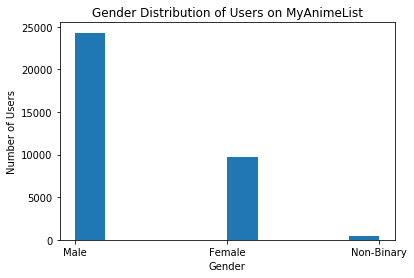

In [9]:
plt.hist(users['gender'])
plt.title("Gender Distribution of Users on MyAnimeList")
plt.xlabel("Gender") and plt.ylabel("Number of Users")
plt.show()

In [12]:
male_count = len(users[users['gender'] == 'Male'])
female_count = len(users[users['gender'] == "Female"])
non_bi_count = len(users[users['gender'] == "Non-Binary"])
print("Number of Male Users: {}".format(male_count))
print("Number of Female Users: {}".format(female_count))
print("Number of Non-Binary Users: {}".format(non_bi_count))

Number of Male Users: 24311
Number of Female Users: 9773
Number of Non-Binary Users: 466


From the above histogram and printed values, we can see that there are approximately 2.5 times more male users (24311 males) than female users (9773 females), and non-binary users make up the smallest portion of the user population (466 non-binary). 

### Age Distribution

In [13]:
#converting the year (str) to year (int)
for i in range(len(users['birth_year'])):
    users['birth_year'][i] = int(users['birth_year'][i])

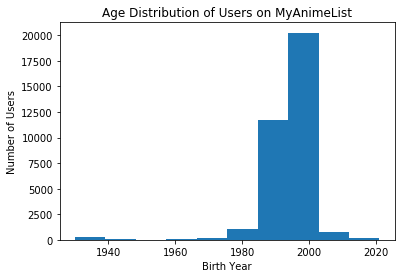

In [27]:
plt.hist(users['birth_year'].values)
plt.title("Age Distribution of Users on MyAnimeList")
plt.xlabel("Birth Year") and plt.ylabel("Number of Users")
plt.show()

In [25]:
print("Highest birth year: " + str(max(users['birth_year'])))
print("Lowest birth year: " + str(min(users['birth_year'])))
users['birth_year'].describe()

Highest birth year: 2021
Lowest birth year: 1930


count     34550
unique       88
top        1997
freq       3023
Name: birth_year, dtype: int64

The above histogram shows that the majority of users are clustered around birth years in the 1990s and 2000s, although there are noticeable outliers with some users noting birth years of below 1950 and above 2007. Since MyAnimeList's user policy states that users must be at least 13 years of age, we excluded users born after 2007  in our analysis below. We also ommitted users born before 1960 since those users are stark outliers. 

Below, we can more clearly see that the majority of users were born sometime between 1995 and early 2000s. 

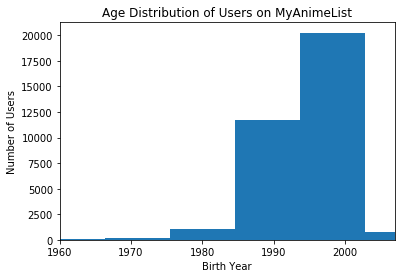

In [30]:
plt.hist(users['birth_year'].values)
plt.title("Age Distribution of Users on MyAnimeList")
plt.xlabel("Birth Year") and plt.ylabel("Number of Users")
plt.xlim([1960, 2007])
plt.show()

### Extracting anime ID from the Users' String of Anime Favorites

The users dataframe presents the anime ID of user favorites in strings. Below, we extract the integer value of those IDs.

In [70]:
### function to extract uid from string
def extract_uid(string): 
    final_list = []
    if '[]' not in string: #ignoring empty lists
        fav_list = string.strip('[]')
        fav_list = fav_list.split("'")
        for anime_id in fav_list:
            if anime_id.isdigit():
                final_list.append(int(anime_id))
    return(final_list)

In [71]:
#Running function on all users' favorites 
fav_lists = []
for each in users['favorites']:
    fav_lists.append(extract_uid(each))
users['favorites'] = fav_lists

## anime_data

The portion below explores the genres of the anime in the anime_data dataframe.

### Genres and their Counts

In [72]:
genre_dict = {}
for anime_tags in anime_data['genre']:
    anime_tags = ast.literal_eval(anime_tags)
    for genre in anime_tags:
        if genre not in genre_dict: 
            genre_dict[genre] = 1 
        else:
            genre_dict[genre] += 1 
print("Number of Unique Anime Genres: " + str(len(genre_dict)))

Number of Unique Anime Genres: 43


In [73]:
genres =[key for key in genre_dict]
genre_counts=[genre_dict[key] for key in genre_dict]

In [74]:
genre_distribution = pd.DataFrame(columns = ['genre', 'counts'])
genre_distribution['genre'] = genres
genre_distribution['counts'] = genre_counts
genre_distribution = genre_distribution.sort_values(by = 'counts', ascending = False)
genre_distribution = genre_distribution.reset_index(drop = True)
print("Below is a dataframe showcasing genres and their counts. Genres with highest counts are on the top.")
print("\nGenre with highest count: " + genre_distribution['genre'][0] + " at " + str(genre_distribution['counts'][0]) + " counts")
print("Genre with lowest count: " + genre_distribution['genre'][len(genre_distribution) - 1] + " at " + str(genre_distribution['counts'][len(genre_distribution) - 1]) + " counts")
genre_distribution

Below is a dataframe showcasing genres and their counts. Genres with highest counts are on the top.

Genre with highest count: Comedy at 6461 counts
Genre with lowest count: Yaoi at 78 counts


,genre,counts
0,Comedy,6461
1,Action,4215
2,Fantasy,3466
3,Adventure,3143
4,Drama,3004
5,Sci-Fi,2832
6,Hentai,2574
7,Kids,2549
8,Shounen,2322
9,Romance,2152


The above analysis shows the number of anime that have a specific genre tag. Below is a visual representation of that information. 

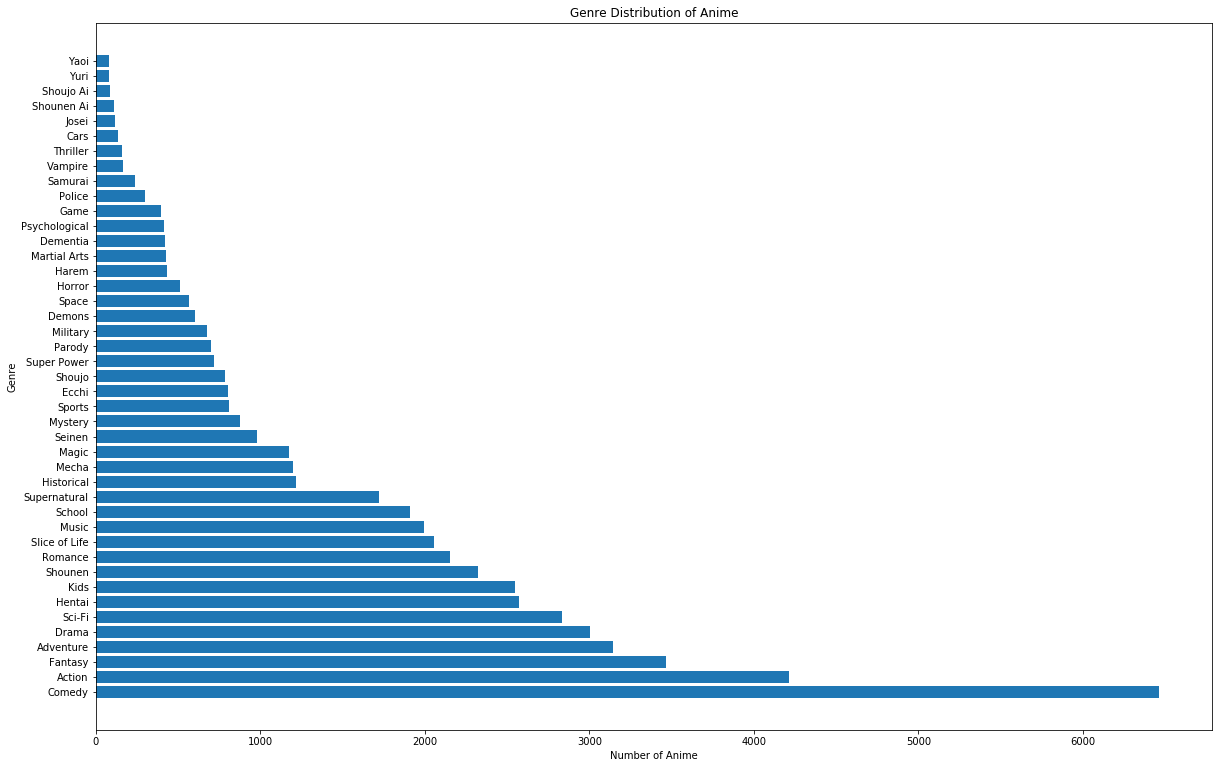

In [75]:
f, ax = plt.subplots(1, 1, figsize = (20, 13))
plt.barh(genre_distribution['genre'], genre_distribution['counts'])
plt.title("Genre Distribution of Anime")
plt.xlabel("Number of Anime") and plt.ylabel("Genre")
plt.show()

# Section 3: Analysis of Gender Differences in Anime Genre Preference

In [125]:
#dummy for gender and genre 
genre_indicator = pd.get_dummies(genres)
gender_indicator = pd.get_dummies(users['gender']) #1 = female, 0 = male 
users['gender'] = gender_indicator

In our analysis of the data, we hope to understand any potential differences in anime genre preferences according to a user's gender. To do so, we will look at the gender of the user and the genres of the anime that they have indicated are their favorites.

First, we created separate dataframes for male vs. female users:

In [126]:
#separate dataframe for male v. female users
female_users = users[users.gender == 1 ]
male_users = users[users.gender == 0]

Next, using the dataframes that we created, we created a list containing all of the females' favorite animes and all of the males' favorite animes. 

In [129]:
#pd Series containing all female favorites 
female_favs = []
for each in female_users['favorites']: 
    for anime in each:
        female_favs.append(anime)
female_favs = pd.Series(female_favs)

#pd Series containing the all male favorites 
male_favs = []
for each in male_users['favorites']: 
    for anime in each:
        male_favs.append(anime)
male_favs = pd.Series(male_favs)

## Top 10 Male vs. Female Favorites

In [130]:
ff_count = female_favs.value_counts().index.tolist()
print("Anime ID of Top 10 female favorites: ")
ff_count = ff_count[0:10]
print(ff_count[0:9])

Anime ID of Top 10 female favorites: 
[5114, 1535, 853, 11061, 16498, 9756, 9253, 21, 1575]


In [131]:
top10_titles = []
f_top10_df = pd.DataFrame(columns = ['uid', 'title'])
f_top10_df['uid'] = ff_count
for anime_id in ff_count: 
    anime = anime_data[anime_data.uid == anime_id].drop_duplicates() 
    index = anime.index[0]
    title = anime_data['title'][index]
    top10_titles.append(title)
f_top10_df['title'] = top10_titles
print("UID and Titles of Top 10 Female Favorites (Ordered from Most Counts to Least Counts):")
f_top10_df.head(10)

UID and Titles of Top 10 Female Favorites (Ordered from Most Counts to Least Counts):


,uid,title
0,5114,Fullmetal Alchemist: Brotherhood
1,1535,Death Note
2,853,Ouran Koukou Host Club
3,11061,Hunter x Hunter (2011)
4,16498,Shingeki no Kyojin
5,9756,Mahou Shoujo Madoka★Magica
6,9253,Steins;Gate
7,21,One Piece
8,1575,Code Geass: Hangyaku no Lelouch
9,20583,Haikyuu!!


In [132]:
mf_count = male_favs.value_counts().index.tolist()
print("Anime ID of Top 10 male favorites: ")
mf_count = mf_count[0:10]
print(mf_count[0:9])

#titles of top10
top10_titles = []
m_top10_df = pd.DataFrame(columns = ['uid', 'title'])
m_top10_df['uid'] = mf_count
for anime_id in mf_count: 
    anime = anime_data[anime_data.uid == anime_id].drop_duplicates() 
    index = anime.index[0]
    title = anime_data['title'][index]
    top10_titles.append(title)
m_top10_df['title'] = top10_titles
print("\nUID and Titles of Top 10 Male Favorites (Ordered from Most Counts to Least Counts):")
m_top10_df.head(10)

Anime ID of Top 10 male favorites: 
[9253, 5114, 4181, 1535, 2001, 11061, 1575, 1, 30]

UID and Titles of Top 10 Male Favorites (Ordered from Most Counts to Least Counts):


,uid,title
0,9253,Steins;Gate
1,5114,Fullmetal Alchemist: Brotherhood
2,4181,Clannad: After Story
3,1535,Death Note
4,2001,Tengen Toppa Gurren Lagann
5,11061,Hunter x Hunter (2011)
6,1575,Code Geass: Hangyaku no Lelouch
7,1,Cowboy Bebop
8,30,Neon Genesis Evangelion
9,21,One Piece


From the above analyses, we see that females and males share some common anime favorites. Namely, many male and female users liked "Fullmetal Alchemist: Brotherhood", "One Piece", "Steins;Gate", and "Code Geass: Hangyaku no Lelouch."

### Genres Top 10 Favorites for Males v. Females

Now that we have the information about the uid and titles of male vs. female favorites, we will next look into the genres of those favorites. First, we analyzed the number of animes of a specific genre among female vs. male's top 10 favorites: 

In [133]:
mtop10_genres = []
for uid in m_top10_df['uid']:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    index = anime.index[0]
    anime_genres = anime_data['genre'][index]
    anime_genres = anime_genres.strip("[]")
    anime_genres = anime_genres.split(", ")
    for i in range(len(anime_genres)):
        anime_genres[i] = anime_genres[i].strip("''")
        mtop10_genres.append(anime_genres[i])
mtop10_genres = pd.Series(mtop10_genres) #all genre tags of male top10 
print("Top 10 Most observed genres of the top 10 male favorites: ")
mgenres = mtop10_genres.value_counts()[:10]
print(mgenres)

Top 10 Most observed genres of the top 10 male favorites: 
Action         7
Drama          6
Adventure      5
Sci-Fi         5
Comedy         5
Shounen        4
Super Power    3
Fantasy        3
Mecha          3
Military       2
dtype: int64


In [134]:
ftop10_genres = []
for uid in f_top10_df['uid']:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    index = anime.index[0]
    anime_genres = anime_data['genre'][index]
    anime_genres = anime_genres.strip("[]")
    anime_genres = anime_genres.split(", ")
    for i in range(len(anime_genres)):
        anime_genres[i] = anime_genres[i].strip("''")
        ftop10_genres.append(anime_genres[i])
ftop10_genres = pd.Series(ftop10_genres) #all genre tags of male top10 
print("Top 10 Most observed genres of the top 10 female favorites: ")
fgenres = ftop10_genres.value_counts()[:10]
print(fgenres)

Top 10 Most observed genres of the top 10 female favorites: 
Drama          6
Shounen        6
Action         5
Fantasy        4
Super Power    4
Comedy         4
Adventure      3
Thriller       3
School         3
Military       3
dtype: int64


Next, we count the number of all animes favorites that have a specific genre tag for female users v. male users. 

In [135]:
f_genre_dict = {}
dropped = 0 
for uid in female_favs:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    if len(anime) == 1: 
        genres = ast.literal_eval(anime['genre'][anime.index[0]])
        for genre in genres: 
            if genre in f_genre_dict: 
                f_genre_dict[genre] += 1 
            else:
                f_genre_dict[genre] = 1 
    else: 
        dropped += 1 
#f_genre_dict

In the analysis above, there were cases where a specific anime UID was not found in the dataset, and thus we dropped those animes from our observation of genres. 

In [136]:
print("Number of anime not found (and thus dropped): " + str(dropped))

Number of anime not found (and thus dropped): 739


In [137]:
f_genres_df = pd.DataFrame(columns = ['genre', 'count_f'])

In [138]:
f_genres = [key for key in f_genre_dict] 
f_counts = [f_genre_dict[key] for key in f_genre_dict]

In [139]:
f_genres_df['genre'] = f_genres
f_genres_df['count_f'] = f_counts
f_genres_df = f_genres_df.sort_values(by = 'count_f', ascending = False)
print("Below shows the number of anime with a specific genre count for female favorites: ")
f_genres_df

Below shows the number of anime with a specific genre count for female favorites: 


,genre,count_f
5,Comedy,25728
0,Action,22376
11,Drama,21315
3,Shounen,16536
18,Supernatural,15306
8,Romance,13841
2,Fantasy,13025
1,Adventure,12996
6,School,11062
17,Mystery,10404


Now, we do the same for males:

In [140]:
m_genre_dict = {}
dropped = 0 
for uid in male_favs:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    if len(anime) == 1: 
        genres = ast.literal_eval(anime['genre'][anime.index[0]])
        for genre in genres: 
            if genre in m_genre_dict: 
                m_genre_dict[genre] += 1 
            else:
                m_genre_dict[genre] = 1 
    else: 
        dropped += 1 
#m_genre_dict

In [141]:
print("Number of anime not found (and thus dropped): " + str(dropped))

Number of anime not found (and thus dropped): 1360


In [142]:
m_genres_df = pd.DataFrame(columns = ['genre', 'count_m'])
m_genres = [key for key in m_genre_dict] 
m_counts = [m_genre_dict[key] for key in m_genre_dict]
m_genres_df['genre'] = m_genres
m_genres_df['count_m'] = m_counts
m_genres_df = m_genres_df.sort_values(by = 'count_m', ascending = False)
print("Below shows the number of anime with a specific genre count for male favorites: ")
m_genres_df

Below shows the number of anime with a specific genre count for male favorites: 


,genre,count_m
3,Action,64463
5,Comedy,63700
1,Drama,59327
9,Shounen,41169
10,Supernatural,38056
4,Adventure,36895
16,Sci-Fi,36131
6,Romance,35694
2,Fantasy,33281
22,School,31415


To do a comparative analysis, we then attempted to merge the two dataframes to compare the numbers. Some analyses we looked at include the % of all genres that counts of a specific genre takes up for males v. females, as well as the ratio of male:female percentages for each genre.  

In [143]:
m_genres_df = m_genres_df.reset_index(drop = True)
f_genres_df = f_genres_df.reset_index(drop = True)

In [144]:
merged = pd.merge(m_genres_df, f_genres_df, on = "genre")

In [145]:
merged['% of all counts (m)'] = len(merged) * [0]
merged['% of all counts (f)'] = len(merged) * [0]
merged['ratio of m:f'] = len(merged) * [0]

In [146]:
m_ratios = []
m_total = sum(merged['count_m'])
f_ratios = []
f_total = sum(merged['count_f'])
mf_ratios = []

for i in range(len(merged)):
    m_ratio = merged['count_m'][i] / m_total * 100
    f_ratio = merged['count_f'][i] / f_total * 100
    mf_ratio = m_ratio / f_ratio
    m_ratios.append(round(m_ratio,4))
    f_ratios.append(round(f_ratio, 4))
    mf_ratios.append(mf_ratio)
    i += 1 
merged['% of all counts (m)'] = m_ratios
merged['% of all counts (f)'] = f_ratios
merged['ratio of m:f'] = mf_ratios
merged

,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Action,64463,22376,9.3838,8.8079,1.065385
1,Comedy,63700,25728,9.2727,10.1273,0.915613
2,Drama,59327,21315,8.6362,8.3902,1.029309
3,Shounen,41169,16536,5.9929,6.5091,0.920701
4,Supernatural,38056,15306,5.5398,6.0249,0.919475
5,Adventure,36895,12996,5.3708,5.1156,1.049872
6,Sci-Fi,36131,8446,5.2595,3.3246,1.582004
7,Romance,35694,13841,5.1959,5.4482,0.953688
8,Fantasy,33281,13025,4.8447,5.1270,0.944925
9,School,31415,11062,4.5730,4.3543,1.050224


Below is a graphic representation of genre counts of male vs. female favorites:

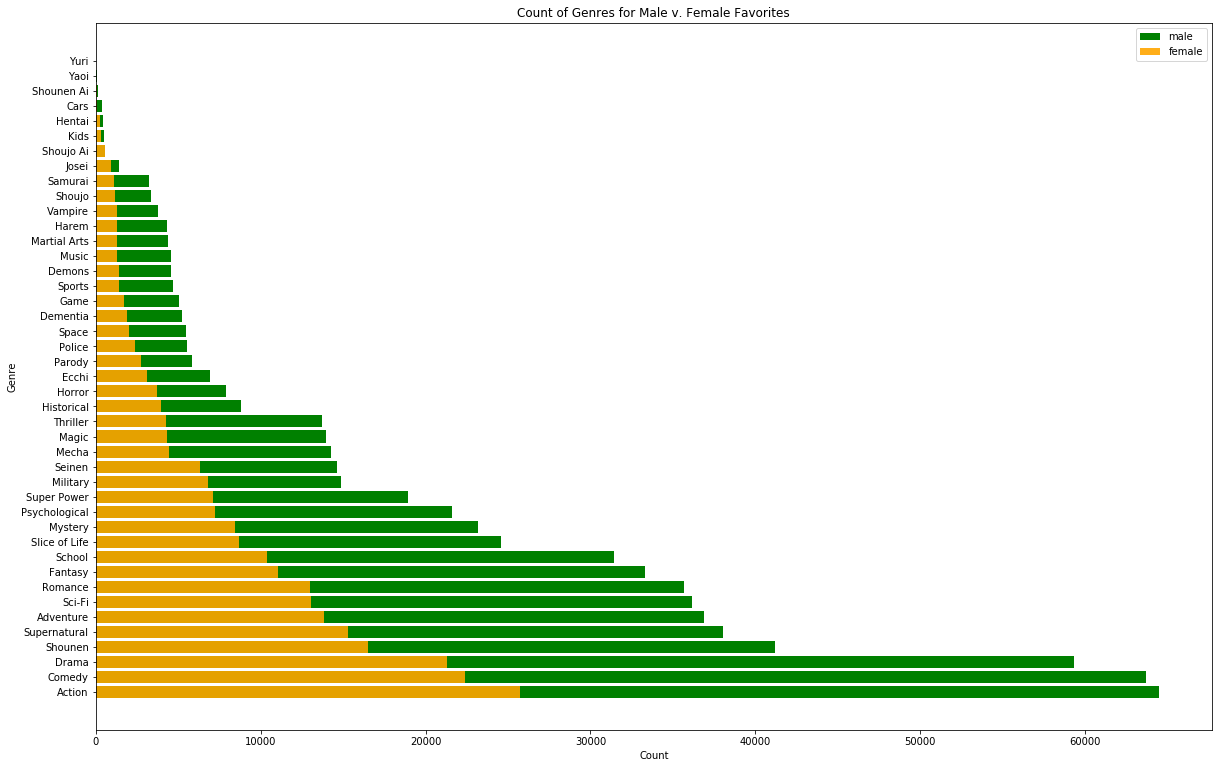

In [160]:
#graphic representation
f, ax = plt.subplots(1, 1, figsize = (20, 13))
plt.barh(merged['genre'], merged['count_m'], label = 'male', color = 'green')
plt.barh(merged['genre'], f_genres_df['count_f'], color = 'orange', label = 'female', alpha = 0.9)
plt.legend()
plt.title("Count of Genres for Male v. Female Favorites")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [158]:
#genre preferences compared
print("Genres where Females have Higher % of Counts than Males: ")
female_pref = merged[merged['% of all counts (f)'] > merged['% of all counts (m)']]
female_pref = female_pref.reset_index(drop = True)
female_pref

Genres where Females have Higher % of Counts than Males: 


,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Comedy,63700,25728,9.2727,10.1273,0.915613
1,Shounen,41169,16536,5.9929,6.5091,0.920701
2,Supernatural,38056,15306,5.5398,6.0249,0.919475
3,Romance,35694,13841,5.1959,5.4482,0.953688
4,Fantasy,33281,13025,4.8447,5.1270,0.944925
5,Mystery,23201,10404,3.3773,4.0953,0.824679
6,Magic,13961,6343,2.0323,2.4968,0.813955
7,Historical,8785,4295,1.2788,1.6906,0.756410
8,Horror,7872,3092,1.1459,1.2171,0.941508
9,Sports,4710,2403,0.6856,0.9459,0.724846


The first dataframe shows that there are indeed certain genres that are named as male favorites more often than female favorites, although the % differences tend to be within 1. The second dataframe shows that there are some genres that females tend to like more than males, the top 10 most common being the ones below: 

In [159]:
female_pref.head(10)

,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Comedy,63700,25728,9.2727,10.1273,0.915613
1,Shounen,41169,16536,5.9929,6.5091,0.920701
2,Supernatural,38056,15306,5.5398,6.0249,0.919475
3,Romance,35694,13841,5.1959,5.4482,0.953688
4,Fantasy,33281,13025,4.8447,5.1270,0.944925
5,Mystery,23201,10404,3.3773,4.0953,0.824679
6,Magic,13961,6343,2.0323,2.4968,0.813955
7,Historical,8785,4295,1.2788,1.6906,0.756410
8,Horror,7872,3092,1.1459,1.2171,0.941508
9,Sports,4710,2403,0.6856,0.9459,0.724846


In [155]:
print('p-value: {}'.format(stats.ttest_ind(merged['count_m'] , merged['count_f'])[1]))

p-value: 0.0008398428186774142


In performing a t-test to examine whether there are significant differences between the counts of genres for male and female favorites, we found that the p-value came out to be 0.0008398428186774142 for a two-tailed test. This is less than the alpha = 0.05, which suggests that the observed gender differences are significant.

# Section 4: Limitations

Although we had a vast array of data available to us, there were some limitations we faced in our analyses. 

Datasets:
- The anime_data dataset was missing some anime titles, which was observed when no anime data could be found for anime of a certain anime uid. 
- The user profiles dataset contained birth years, but the outliers in birth years demonstrate that some user data might have been fabricated. This puts the validity of the data into question since the birth years in the dataset might not have been the users' actual birth years. 

Analysis: 
- Users identified themselves as female, male, or non-binary. While doing analysis on gender-based differences in genre preference, we ommitted looking at non-binary users because they were an extremely small fraction of the user population, and we were primarily interested in male vs. female differences. Thus, our analysis does not cover gender preferences for non-binary users. 
- When evaluating genres, we had way more animes of a genre than there are anime observations in general. This may be due to the fact that the dataset has duplicate observations for anime (which we will try to remove earlier on in the code for the next phase), and the high observation of genres may also be due to the fact that each anime can be tagged with multiple genres. 